# Assignment No-5 EDA - I


#### *1*  Data Cleaning and Preparation:

In [179]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [180]:
# Load the dataset into a DataFrame

df = pd.read_csv("Cardiotocographic.csv")



In [181]:
# View first 5 Data to overlook to dataset
df.head()


LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [182]:
# Information About The Dataset Like type of Data inside columns and No-Null value Count 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [183]:
# Represent Duplicates
df.duplicated().sum()


2

In [184]:
# Represent the diamention of data 
df.shape


(2126, 14)

In [185]:
# Drop Duplicates 
df.drop_duplicates(inplace=True)


In [186]:
# Represent no Duplicates
df.duplicated().sum()


0

In [187]:
# Handle missing values appropriately (e.g., imputation, deletion).
df.isnull().sum()


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [188]:
# Percentage of Missing Value in Data Frame 
for i in df.isnull().sum():
    print(f"Missing Value Percentage: {i/len(df)*100:.2f}%")


Missing Value Percentage: 0.99%
Missing Value Percentage: 0.94%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.99%
Missing Value Percentage: 0.99%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.00%
Missing Value Percentage: 0.99%
Missing Value Percentage: 0.99%
Missing Value Percentage: 0.99%
Missing Value Percentage: 0.99%


Percentage Criteria :- 
- Low Missing Rate (<5%): Usually, imputation or deletion works well.
- Moderate Missing Rate (5%-30%): Imputation is typically preferred.
- High Missing Rate (>30%): Consider carefully, as imputing or removing could introduce bias or reduce data quality.

In [189]:
# According to Percentage Criteria drop null value
df.dropna(inplace=True)


In [190]:
#	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

df.dtypes

#All column in numeric data type and his actually in numeric data type


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [191]:
# 	Detect and treat outliers if necessary.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR  = Q3 - Q1
IQR

lower_bound = Q1 - (1.5)* IQR
print(lower_bound)
upper_bound = Q3 + (1.5)* IQR
outliers = ((df < lower_bound) | (df> upper_bound))
outliers

print("\nOutliers Detected per Column:")
print(outliers[outliers > 0])


LB          105.000000
AC           -0.008475
FM           -0.003839
UC           -0.005219
DL           -0.004942
DS            0.000000
DP            0.000000
ASTV        -11.500000
MSTV         -0.800000
ALTV        -16.500000
MLTV         -4.850000
Width       -57.500000
Tendency     -1.500000
NSP           1.000000
dtype: float64

Outliers Detected per Column:
       LB   AC    FM   UC   DL   DS   DP ASTV MSTV  ALTV  MLTV Width Tendency  \
0     NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  True   NaN   NaN      NaN   
1     NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN      NaN   
2     NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN      NaN   
3     NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  True   NaN      NaN   
4     NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN      NaN   
...   ...  ...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...      ...   
2121  NaN  NaN  True  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   

In [192]:
# Statistical Summary
# Display statistical summary for numerical columns
df.describe()

# Display statistical summary for numerical and Object columns
df.describe(include='all')


LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean    133.342023     0.003203     0.009973     0.004391     0.001894   
std      11.268266     0.004325     0.067902     0.003350     0.003349   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002559     0.006543     0.003295   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.000003     0.000175    47.013569     1.360968    10.363493   
std       0.000142     0.000840    18.846186     1.173620    21.289827   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean      8.280546    70.461052     0.316672     1.304797  
std       7.774969    42.939806     0.645855     0.644857  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.486468     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

<Axes: >

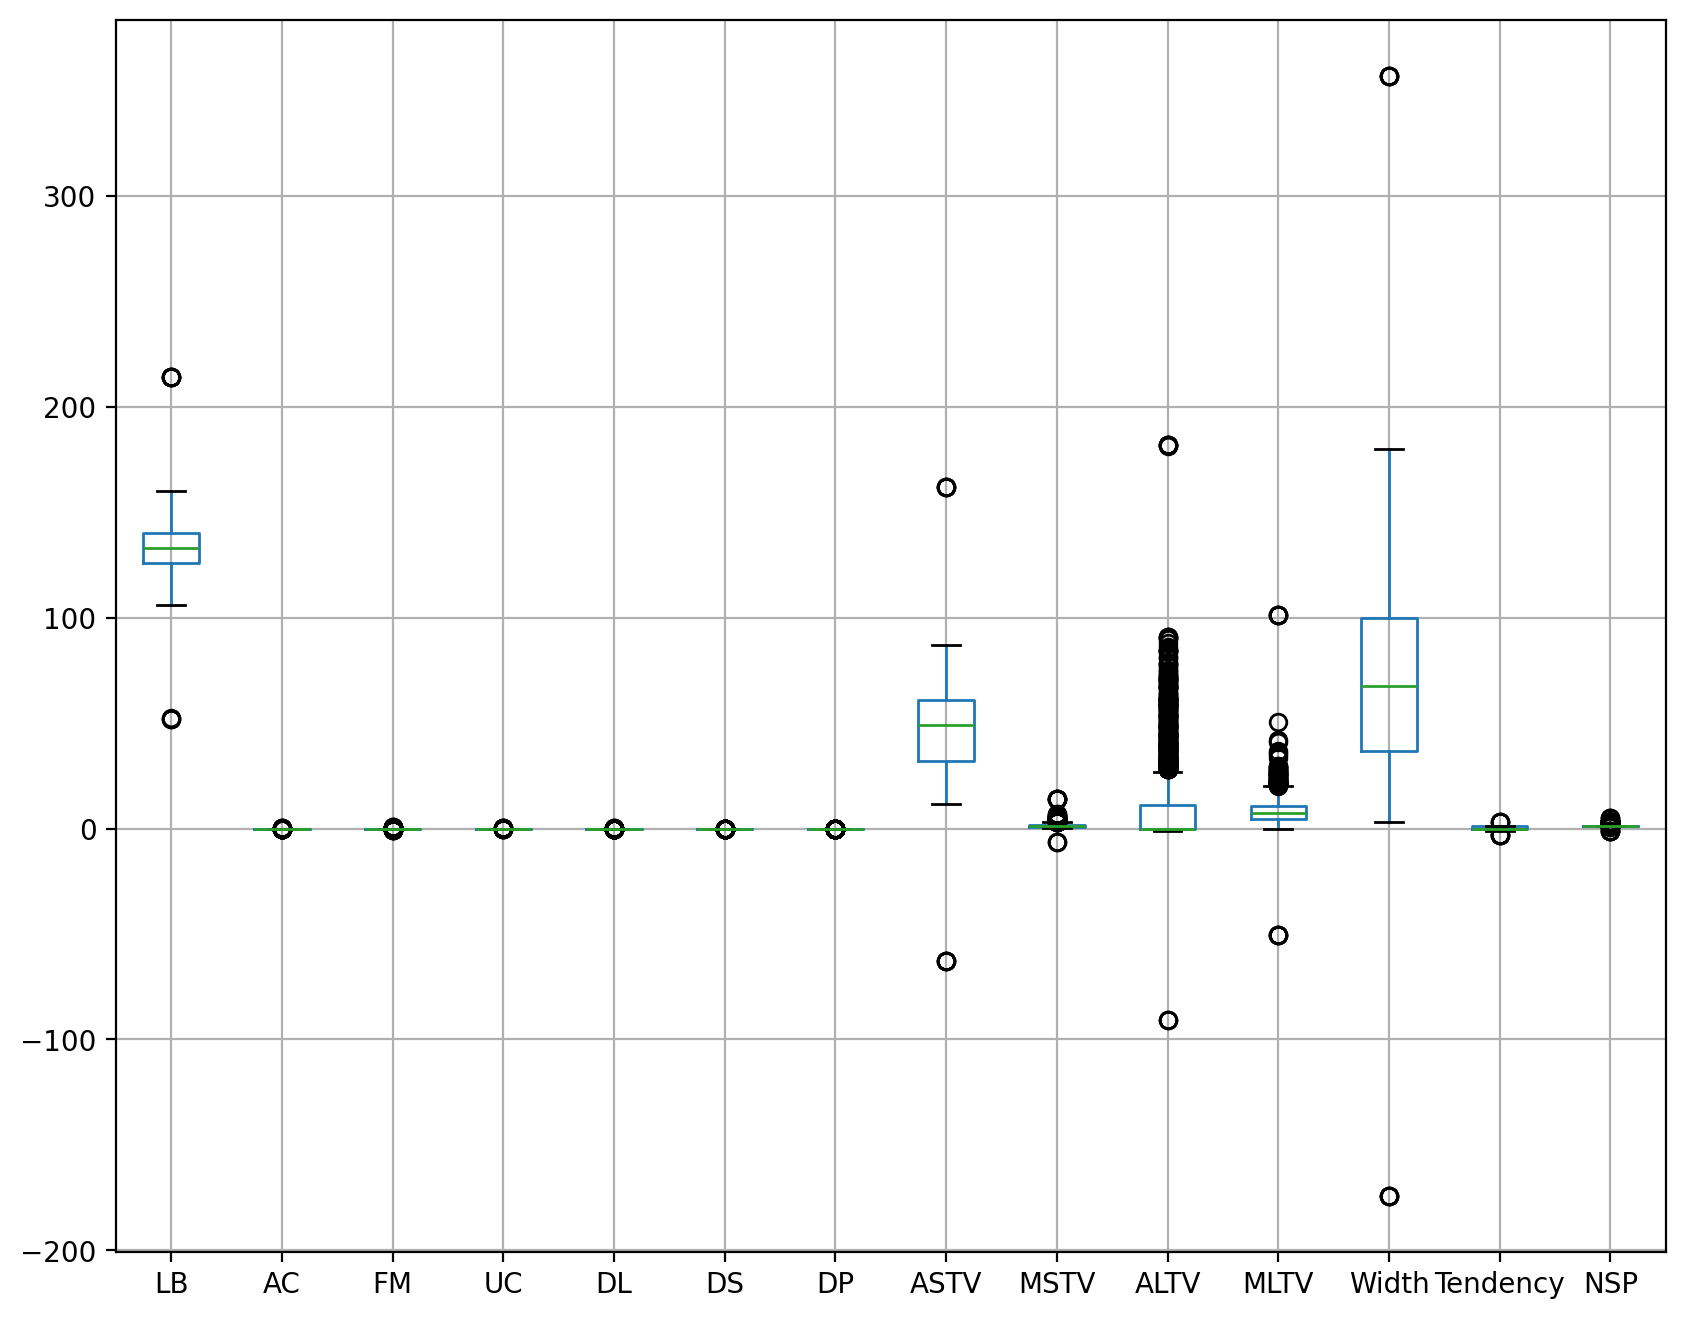

In [193]:
df.boxplot()


### Columns Where Outliers are **Important and Should Be Retained**:

1. **NSP (Possible health outcomes)**:
   - Outliers could indicate critical classifications (e.g., pathological or suspect cases). These should be retained for further clinical investigation.

2. **FM (Fetal Movements)**:
   - Unusual fetal movement may signify distress or health issues, so it’s crucial to retain these outliers to examine their medical relevance.

3. **ALTV (Abnormal Long-Term Variability)** and **ASTV (Abnormal Short-Term Variability)**:
   - These represent variability in the fetal heart rate. Significant deviations could indicate problems with fetal heart rate regulation, which are important to retain and analyze further.

4. **DL (Decelerations Late), DS (Decelerations Short), DP (Decelerations Prolonged)**:
   - Decelerations can be critical signs of fetal distress. Retaining these outliers is important, as they could signal significant clinical events.

### Columns Where Outliers are Likely **Noise or Error and Can Be Removed**:

1. **AC (Accelerations)**:
   - If accelerations are extreme, they might be due to noise or measurement errors, especially if they are unrelated to outcomes like NSP. Consider removing outliers after confirming their clinical irrelevance.

2. **UC (Uterine Contractions)**:
   - Significant deviations could result from technical issues rather than physiological phenomena. Removing extreme outliers might be appropriate unless there's a clear link to outcomes.

3. **Width, Tendency**:
   - These may be more technical or calculated variables with less direct physiological relevance, so extreme outliers here may indicate errors in measurement or data processing.

4. **LB (Baseline Fetal Heart Rate)**:
   - Baseline heart rate is crucial, but extreme outliers may be more likely due to recording errors or unusual conditions that could be excluded if they skew the data without clinical justification.

### General Approach:

1. **Retain clinically important variables** (like FM, DL, DP, ASTV, etc.), especially if they are connected to fetal health conditions.
2. **Remove outliers** in columns that are more likely to contain measurement noise or non-clinical variability (like UC, Width, or Tendency) after careful review.

---


In [194]:
#outlier Replacement for AC(Acceleration), UC(Uterine Contraction), Width Tendency, LB(Baseline Fetal Heart Rate)
columns = ["LB","AC","UC","Width","Tendency"]
def capping(Data , column):
    for col in column:
        q1 = Data[col].quantile(0.25)
        q3 = Data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        uperr_bound = q3 + (1.5 * iqr)
        df[col] = np.where(df[col] > uperr_bound,uperr_bound , np.where(df[col] < lower_bound , lower_bound, df[col]) )
    return df


In [195]:
df_new = capping(df,columns)


In [196]:
outliers = ((df < lower_bound) | (df> upper_bound)).sum()
outliers


LB            0
AC            0
FM          343
UC            0
DL          124
DS          120
DP          284
ASTV         10
MSTV         78
ALTV        317
MLTV         81
Width         0
Tendency      0
NSP         559
dtype: int64

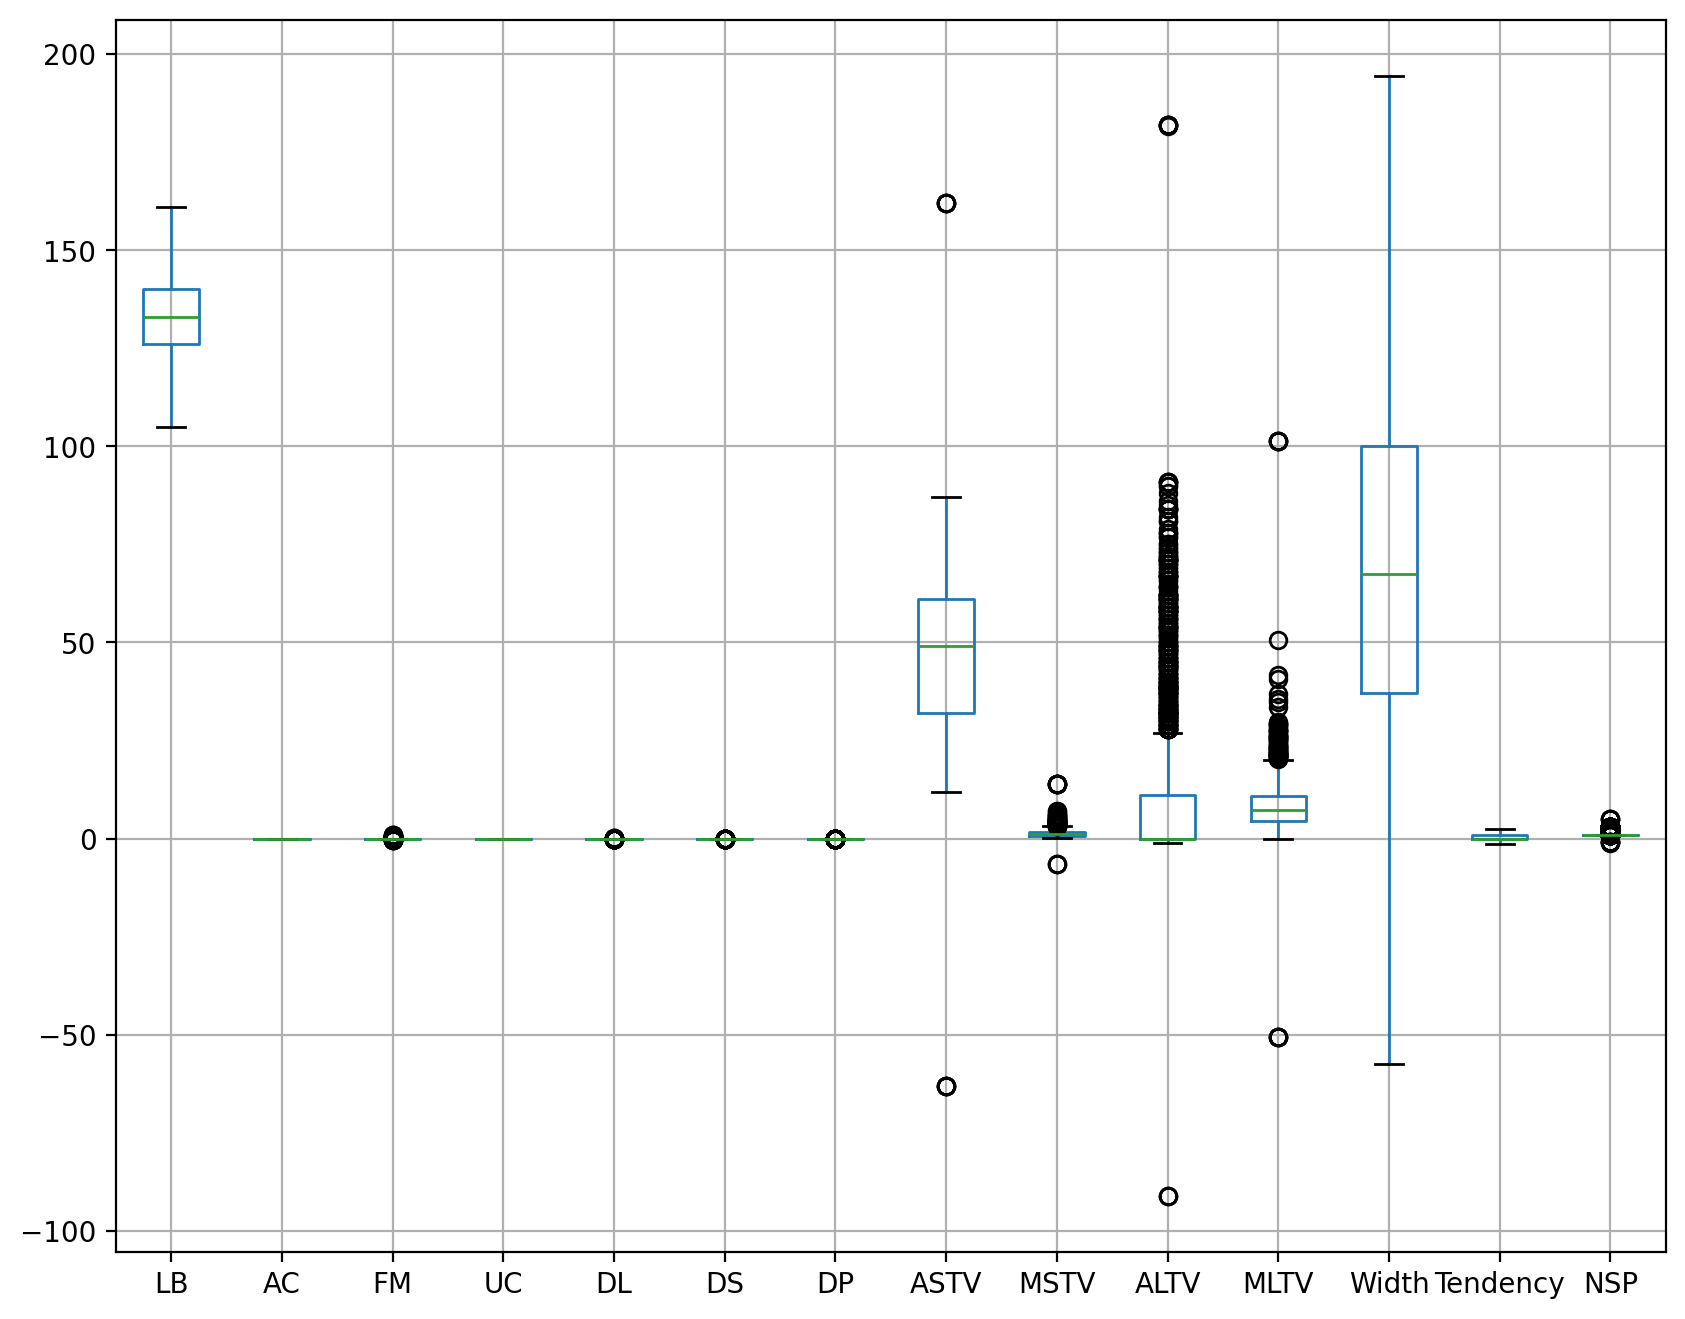

In [197]:
df_new.boxplot()
plt.show()


# *2.*	Statistical Summary:

# Interesting Findings and Key Observations

## Interesting Findings:

1. **NSP (Outcome variable)**:
   - **Mean**: 1.30
   - **Standard Deviation**: 0.64
   - The high number of outliers (559) suggests that there are important cases, possibly indicating pathological or high-risk cases that require further investigation.

2. **FM (Fetal Movements)**:
   - The values for fetal movements range widely from -0.48 to 0.96, showing considerable variability.
   - The large number of outliers (343) might be critical for detecting abnormal fetal conditions, as fetal movements are often a key indicator of well-being.

3. **ALTV (Abnormal Long-Term Variability)**:
   - **Range**: -91 to 182
   - **Standard Deviation**: 21.2
   - This variable shows substantial variability, which could indicate potential fetal distress or other abnormal conditions related to long-term heart rate variability.

4. **ASTV (Abnormal Short-Term Variability)**:
   - **Range**: -63 to 162
   - This variable also exhibits significant variation, with high values potentially correlating to abnormal fetal heart rate conditions. The extreme values here might be medically important.

5. **LB (Baseline Fetal Heart Rate)**:
   - **Mean**: 133 bpm
   - **Standard Deviation**: 11.27
   - The relatively low variability in the baseline fetal heart rate suggests stability across the dataset, with only a small number of outliers that might represent extreme health conditions.

6. **AC (Accelerations)** and **UC (Uterine Contractions)**:
   - These variables have small means (close to zero) and low standard deviations, which suggests that outliers could either be noise or rare clinical conditions.

---

## Key Observations:

- **High Variability**: Variables like **FM**, **ALTV**, and **ASTV** show significant variability and contain many outliers. These variables may be crucial for detecting signs of fetal distress or abnormal health conditions and should be carefully analyzed.
  
- **Low Variability**: Variables such as **LB (Baseline Fetal Heart Rate)**, **AC (Accelerations)**, and **UC (Uterine Contractions)** show less variability. In these cases, outliers may represent rare clinical scenarios or recording errors.

- **Outliers in Outcome Variable (NSP)**: The **NSP** column, which likely represents health outcomes, has a large number of outliers. These may correspond to suspect or pathological classifications, highlighting the need for further clinical attention and investigation.

---

These findings suggest that the dataset contains important clinical outliers in several variables, particularly related to fetal movements and heart rate variability. Further analysis of these outliers could provide valuable insights into fetal health.


In [198]:
# Statistical Summary
summary_stats = df_new.describe().T

summary_stats['median'] = df_new.median()
summary_stats['IQR'] = df_new.quantile(0.75) - df_new.quantile(0.25)

summary_stats




count        mean        std         min         25%         50%  \
LB        2103.0  133.291604   9.976211  105.000000  126.000000  133.000000   
AC        2103.0    0.003144   0.003844   -0.008475    0.000000    0.001631   
FM        2103.0    0.009973   0.067902   -0.480634    0.000000    0.000000   
UC        2103.0    0.004361   0.003008   -0.005219    0.001838    0.004484   
DL        2103.0    0.001894   0.003349   -0.015393    0.000000    0.000000   
DS        2103.0    0.000003   0.000142   -0.001353    0.000000    0.000000   
DP        2103.0    0.000175   0.000840   -0.005348    0.000000    0.000000   
ASTV      2103.0   47.013569  18.846186  -63.000000   32.000000   49.000000   
MSTV      2103.0    1.360968   1.173620   -6.600000    0.700000    1.200000   
ALTV      2103.0   10.363493  21.289827  -91.000000    0.000000    0.000000   
MLTV      2103.0    8.280546   7.774969  -50.700000    4.600000    7.400000   
Width     2103.0   70.351685  39.773195  -57.500000   37.000000   67.486468   
Tendency  2103.0    0.319999   0.624916   -1.500000    0.000000    0.000000   
NSP       2103.0    1.304797   0.644857   -1.025988    1.000000    1.000000   

                 75%         max      median        IQR  
LB        140.000000  161.000000  133.000000  14.000000  
AC          0.005650    0.014124    0.001631   0.005650  
FM          0.002559    0.961268    0.000000   0.002559  
UC          0.006543    0.013601    0.004484   0.004705  
DL          0.003295    0.030769    0.000000   0.003295  
DS          0.000000    0.002706    0.000000   0.000000  
DP          0.000000    0.010695    0.000000   0.000000  
ASTV       61.000000  162.000000   49.000000  29.000000  
MSTV        1.700000   13.800000    1.200000   1.000000  
ALTV       11.000000  182.000000    0.000000  11.000000  
MLTV       10.900000  101.400000    7.400000   6.300000  
Width     100.000000  194.500000   67.486468  63.000000  
Tendency    1.000000    2.500000    0.000000   1.000000  
NSP         1.000000    5.000000    1.000000   0.000000

# 3.	Data Visualization:

In [199]:
plt.tight_layout()
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200


<Figure size 2000x1600 with 0 Axes>

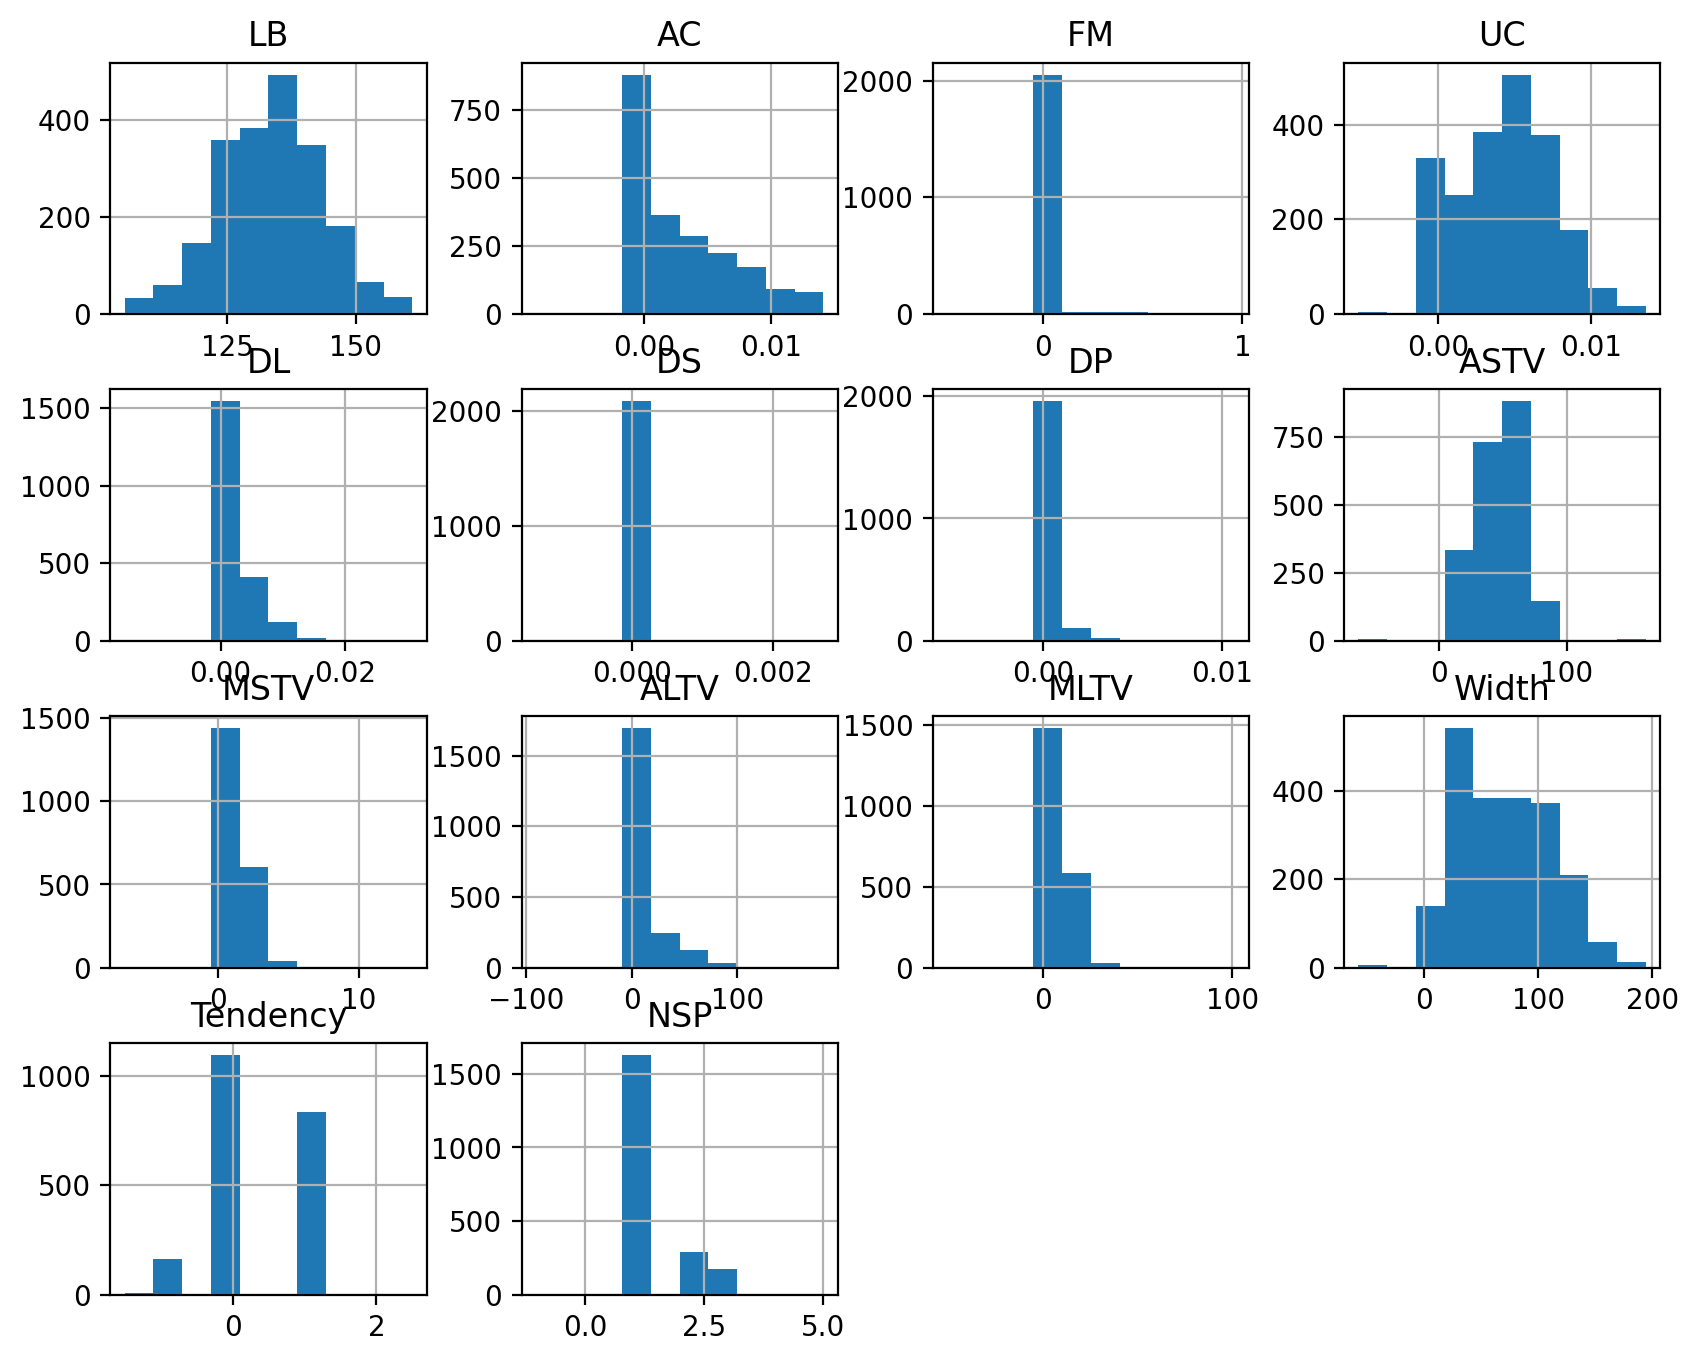

In [200]:
# histrogram
df.hist()
plt.show()


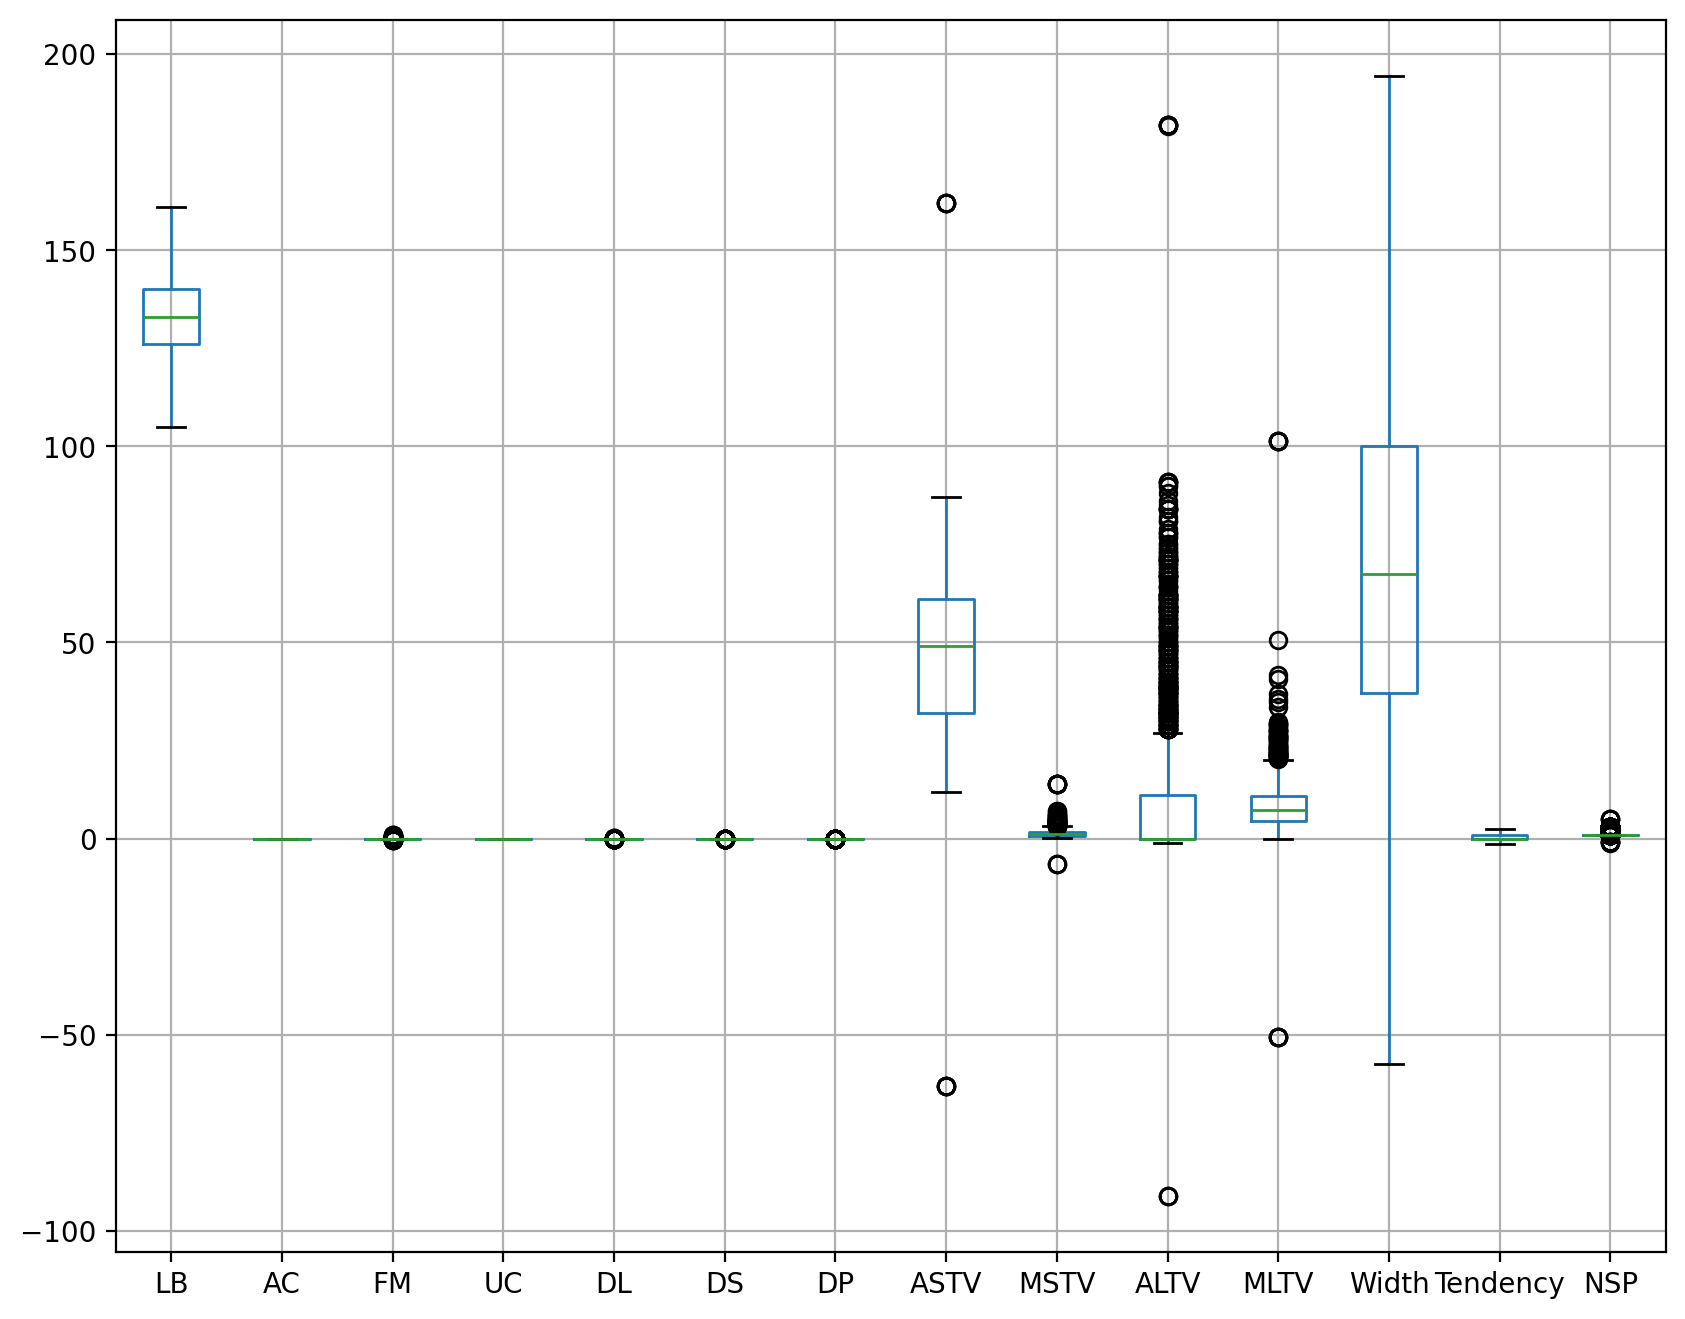

In [201]:
# Box Plot

df_new.boxplot()
plt.show()


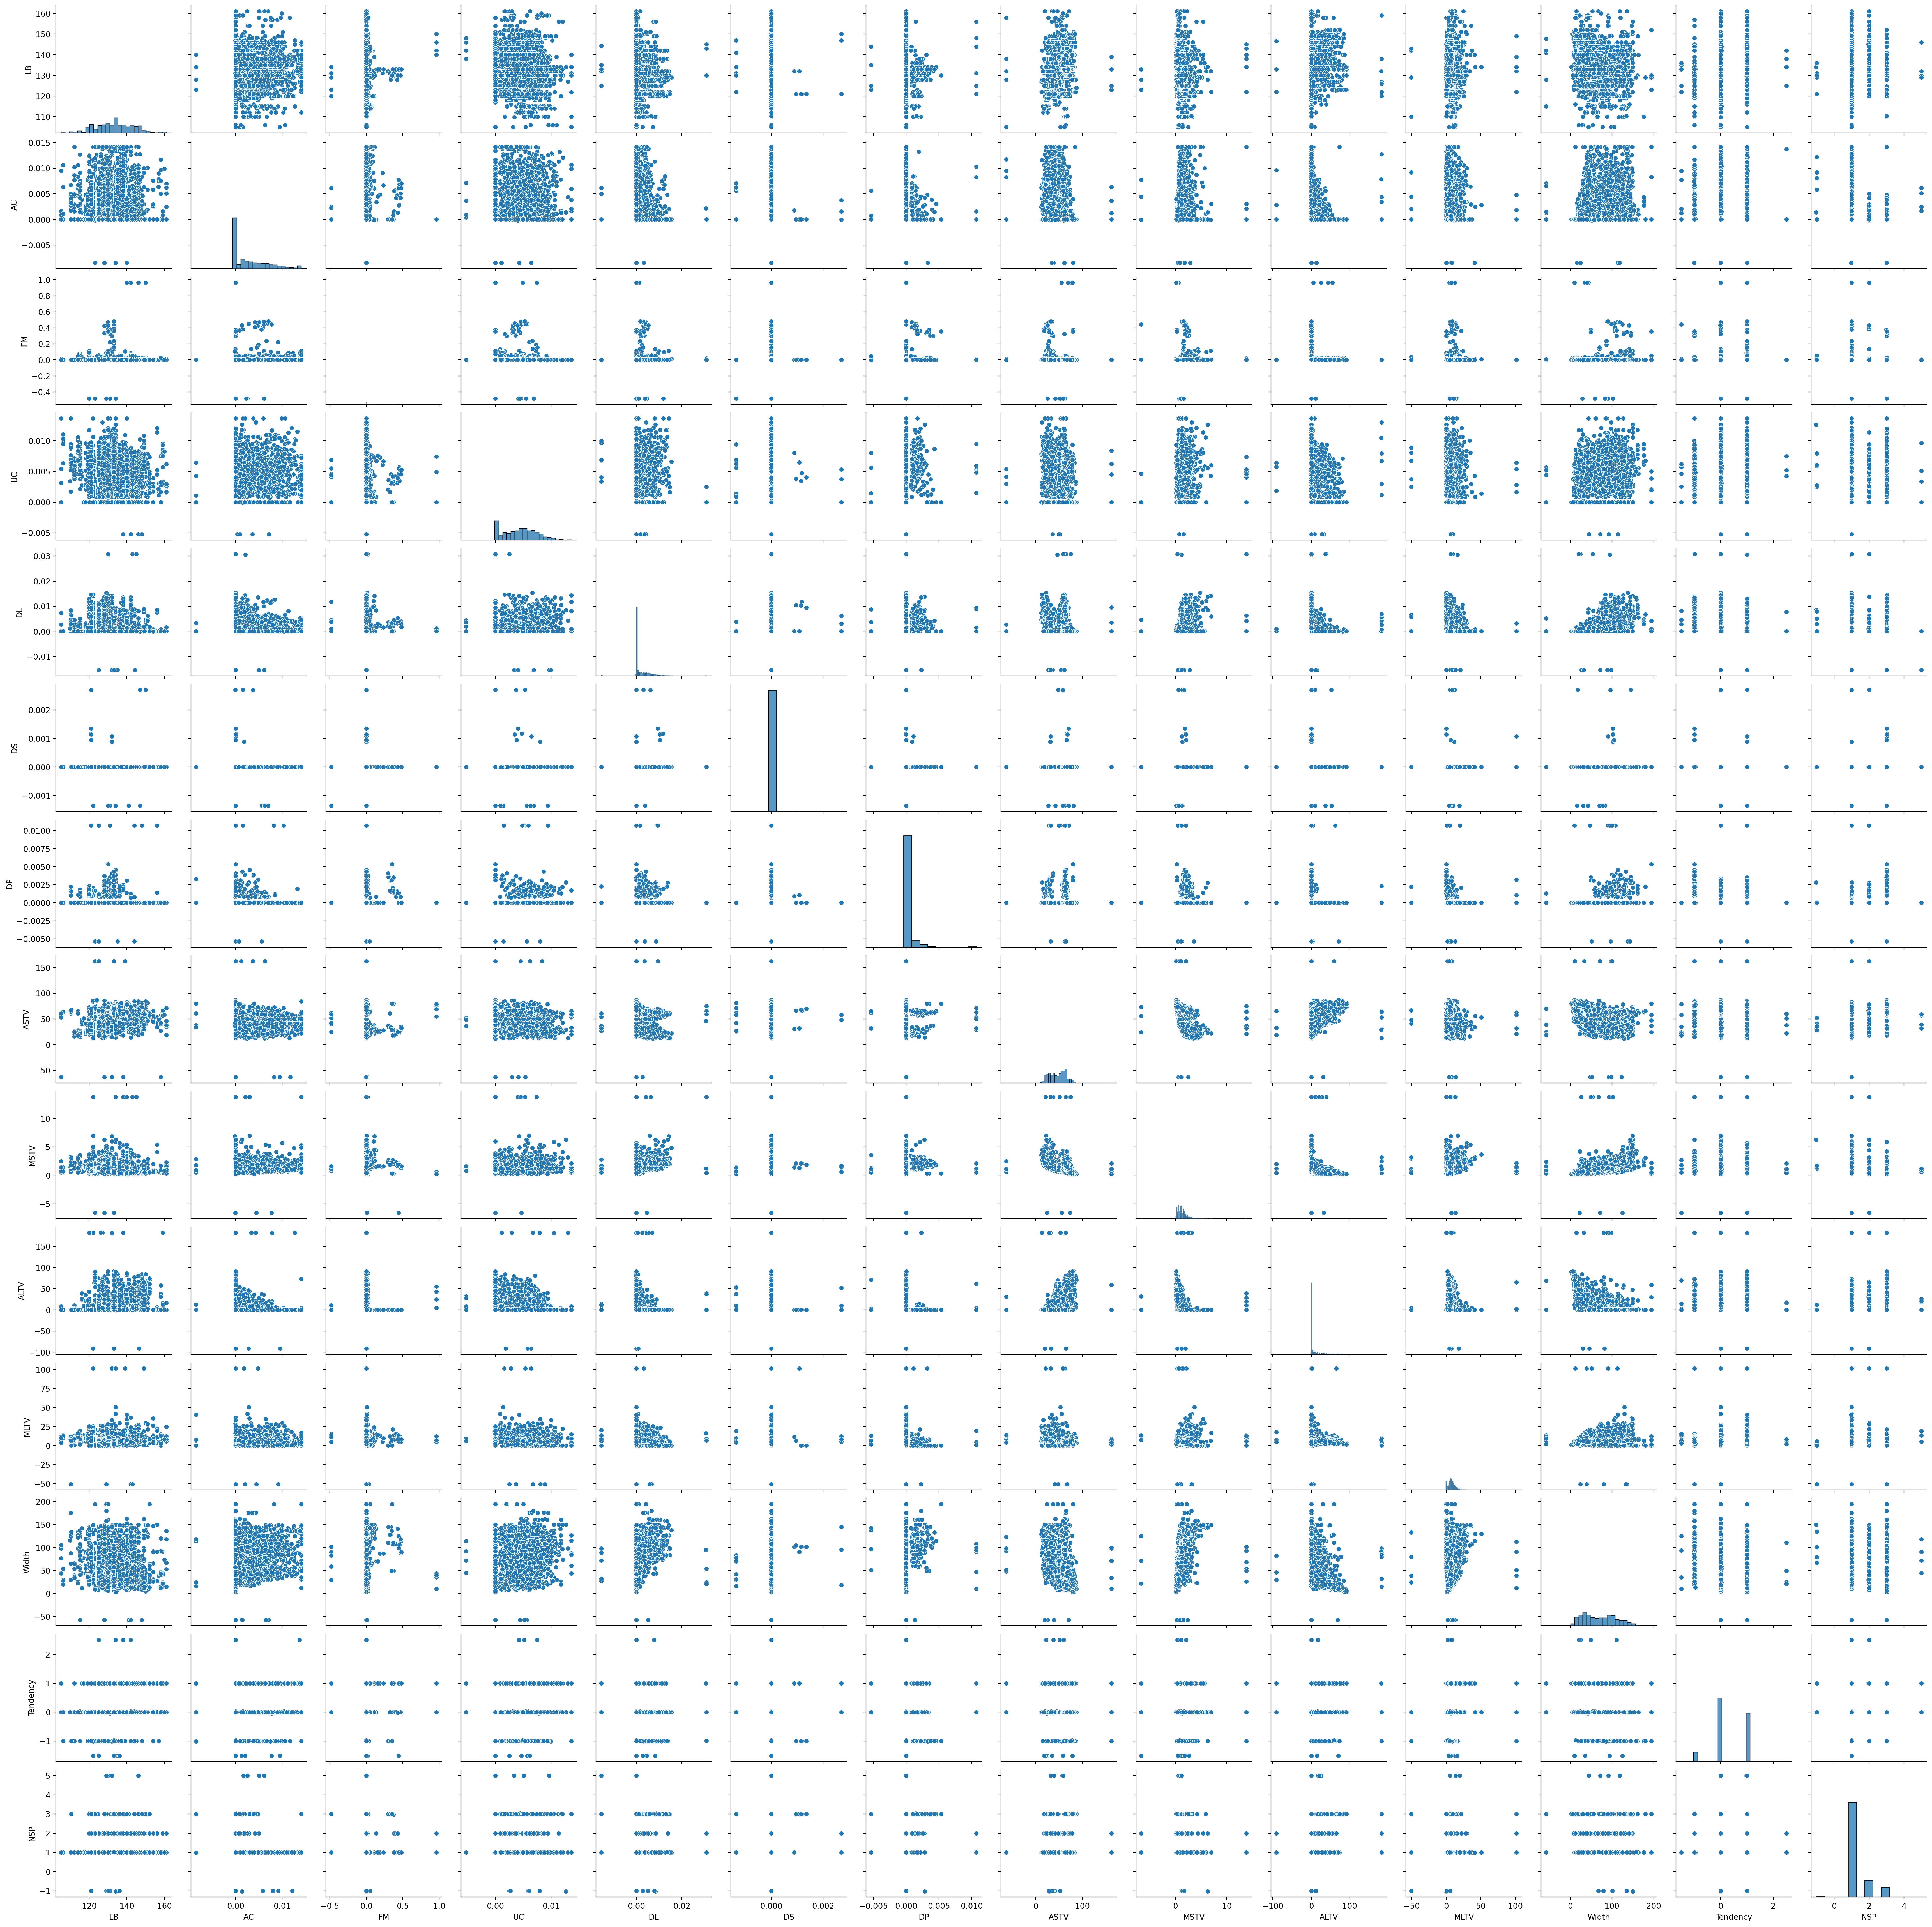

In [202]:
sns.pairplot(df_new)
plt.show()


### Correlation Criteria
- Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation)
- A value of 0 indicates no correlation


In [203]:
df_new.corr(numeric_only=True)


LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.081715  0.021950 -0.163801 -0.134231 -0.006038   
AC       -0.081715  1.000000  0.011788  0.092527 -0.103958 -0.037563   
FM        0.021950  0.011788  1.000000 -0.057776  0.009753  0.029899   
UC       -0.163801  0.092527 -0.057776  1.000000  0.215026 -0.007575   
DL       -0.134231 -0.103958  0.009753  0.215026  1.000000  0.058625   
DS       -0.006038 -0.037563  0.029899 -0.007575  0.058625  1.000000   
DP       -0.052844 -0.086779  0.121259  0.075354  0.145338  0.004282   
ASTV      0.267693 -0.261768 -0.032931 -0.203205 -0.071342  0.008441   
MSTV     -0.192111  0.140586  0.017488  0.212775  0.410270  0.016165   
ALTV      0.239670 -0.311676 -0.012345 -0.245670 -0.186882 -0.004406   
MLTV     -0.009805 -0.115275 -0.006157 -0.055069 -0.165494  0.034366   
Width    -0.140008  0.284221  0.093873  0.131446  0.443141  0.044131   
Tendency  0.281361  0.029530 -0.012060 -0.074465 -0.023144 -0.016026   
NSP       0.147610 -0.350612  0.073997 -0.202860  0.025179  0.065399   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.052844  0.267693 -0.192111  0.239670 -0.009805 -0.140008   
AC       -0.086779 -0.261768  0.140586 -0.311676 -0.115275  0.284221   
FM        0.121259 -0.032931  0.017488 -0.012345 -0.006157  0.093873   
UC        0.075354 -0.203205  0.212775 -0.245670 -0.055069  0.131446   
DL        0.145338 -0.071342  0.410270 -0.186882 -0.165494  0.443141   
DS        0.004282  0.008441  0.016165 -0.004406  0.034366  0.044131   
DP        1.000000  0.038076  0.119911 -0.077865 -0.113993  0.179557   
ASTV      0.038076  1.000000 -0.293322  0.357478 -0.219922 -0.230751   
MSTV      0.119911 -0.293322  1.000000 -0.291405  0.028807  0.472443   
ALTV     -0.077865  0.357478 -0.291405  1.000000 -0.107475 -0.376872   
MLTV     -0.113993 -0.219922  0.028807 -0.107475  1.000000  0.066978   
Width     0.179557 -0.230751  0.472443 -0.376872  0.066978  1.000000   
Tendency -0.135994 -0.014200 -0.045495  0.039225  0.121701  0.100997   
NSP       0.294416  0.422515 -0.095143  0.365708 -0.113445 -0.073587   

          Tendency       NSP  
LB        0.281361  0.147610  
AC        0.029530 -0.350612  
FM       -0.012060  0.073997  
UC       -0.074465 -0.202860  
DL       -0.023144  0.025179  
DS       -0.016026  0.065399  
DP       -0.135994  0.294416  
ASTV     -0.014200  0.422515  
MSTV     -0.045495 -0.095143  
ALTV      0.039225  0.365708  
MLTV      0.121701 -0.113445  
Width     0.100997 -0.073587  
Tendency  1.000000 -0.113157  
NSP      -0.113157  1.000000

<Axes: >

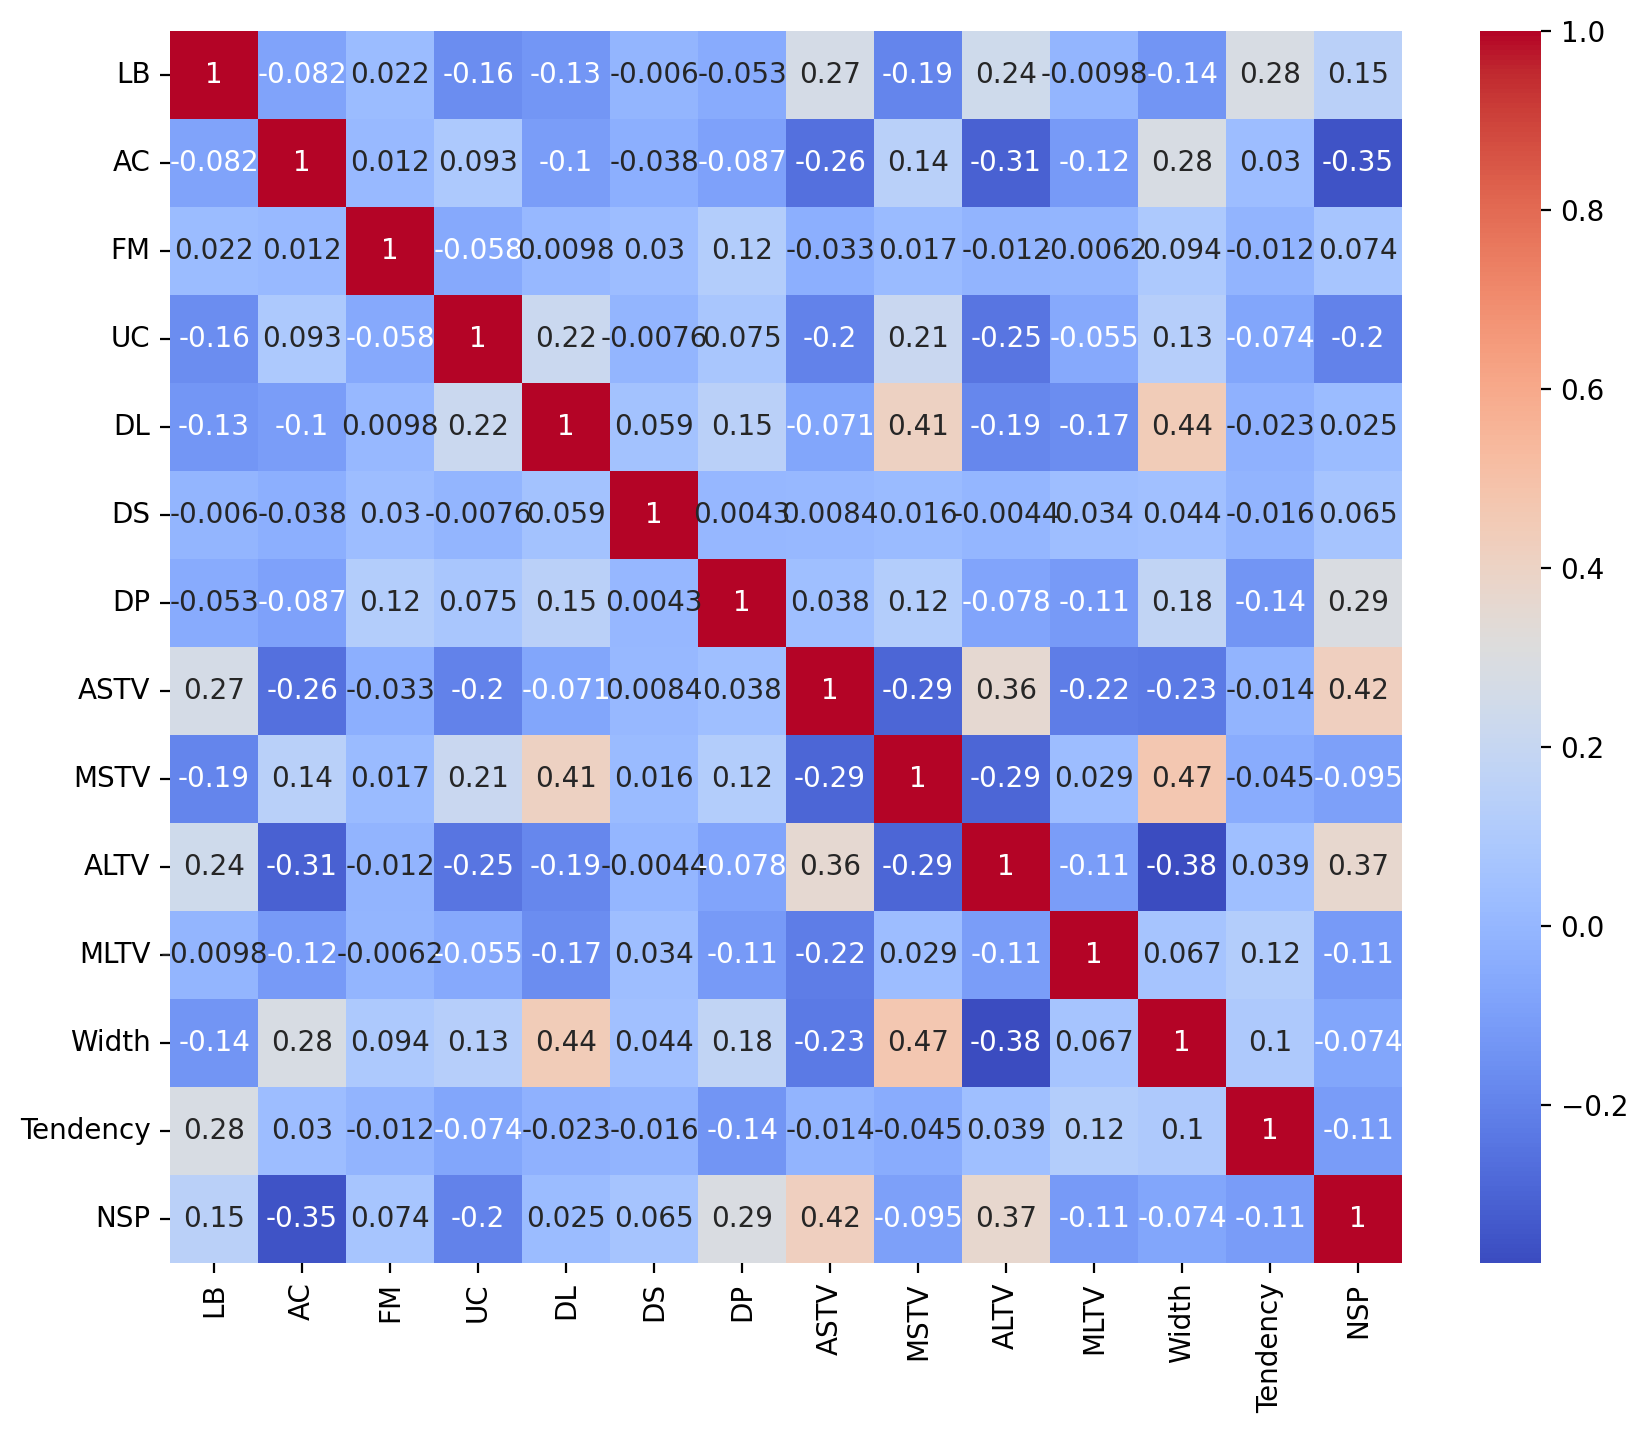

In [204]:
# Heat Map
sns.heatmap(df_new.corr(numeric_only=True), annot=True, cmap='coolwarm', square=True )


In [205]:
# Calculate the correlation of FM with other variables
fm_correlation = df.corr()['FM'].sort_values(ascending=False)
print(fm_correlation)


FM          1.000000
DP          0.121259
Width       0.093873
NSP         0.073997
DS          0.029899
LB          0.021950
MSTV        0.017488
AC          0.011788
DL          0.009753
MLTV       -0.006157
Tendency   -0.012060
ALTV       -0.012345
ASTV       -0.032931
UC         -0.057776
Name: FM, dtype: float64


<Axes: >

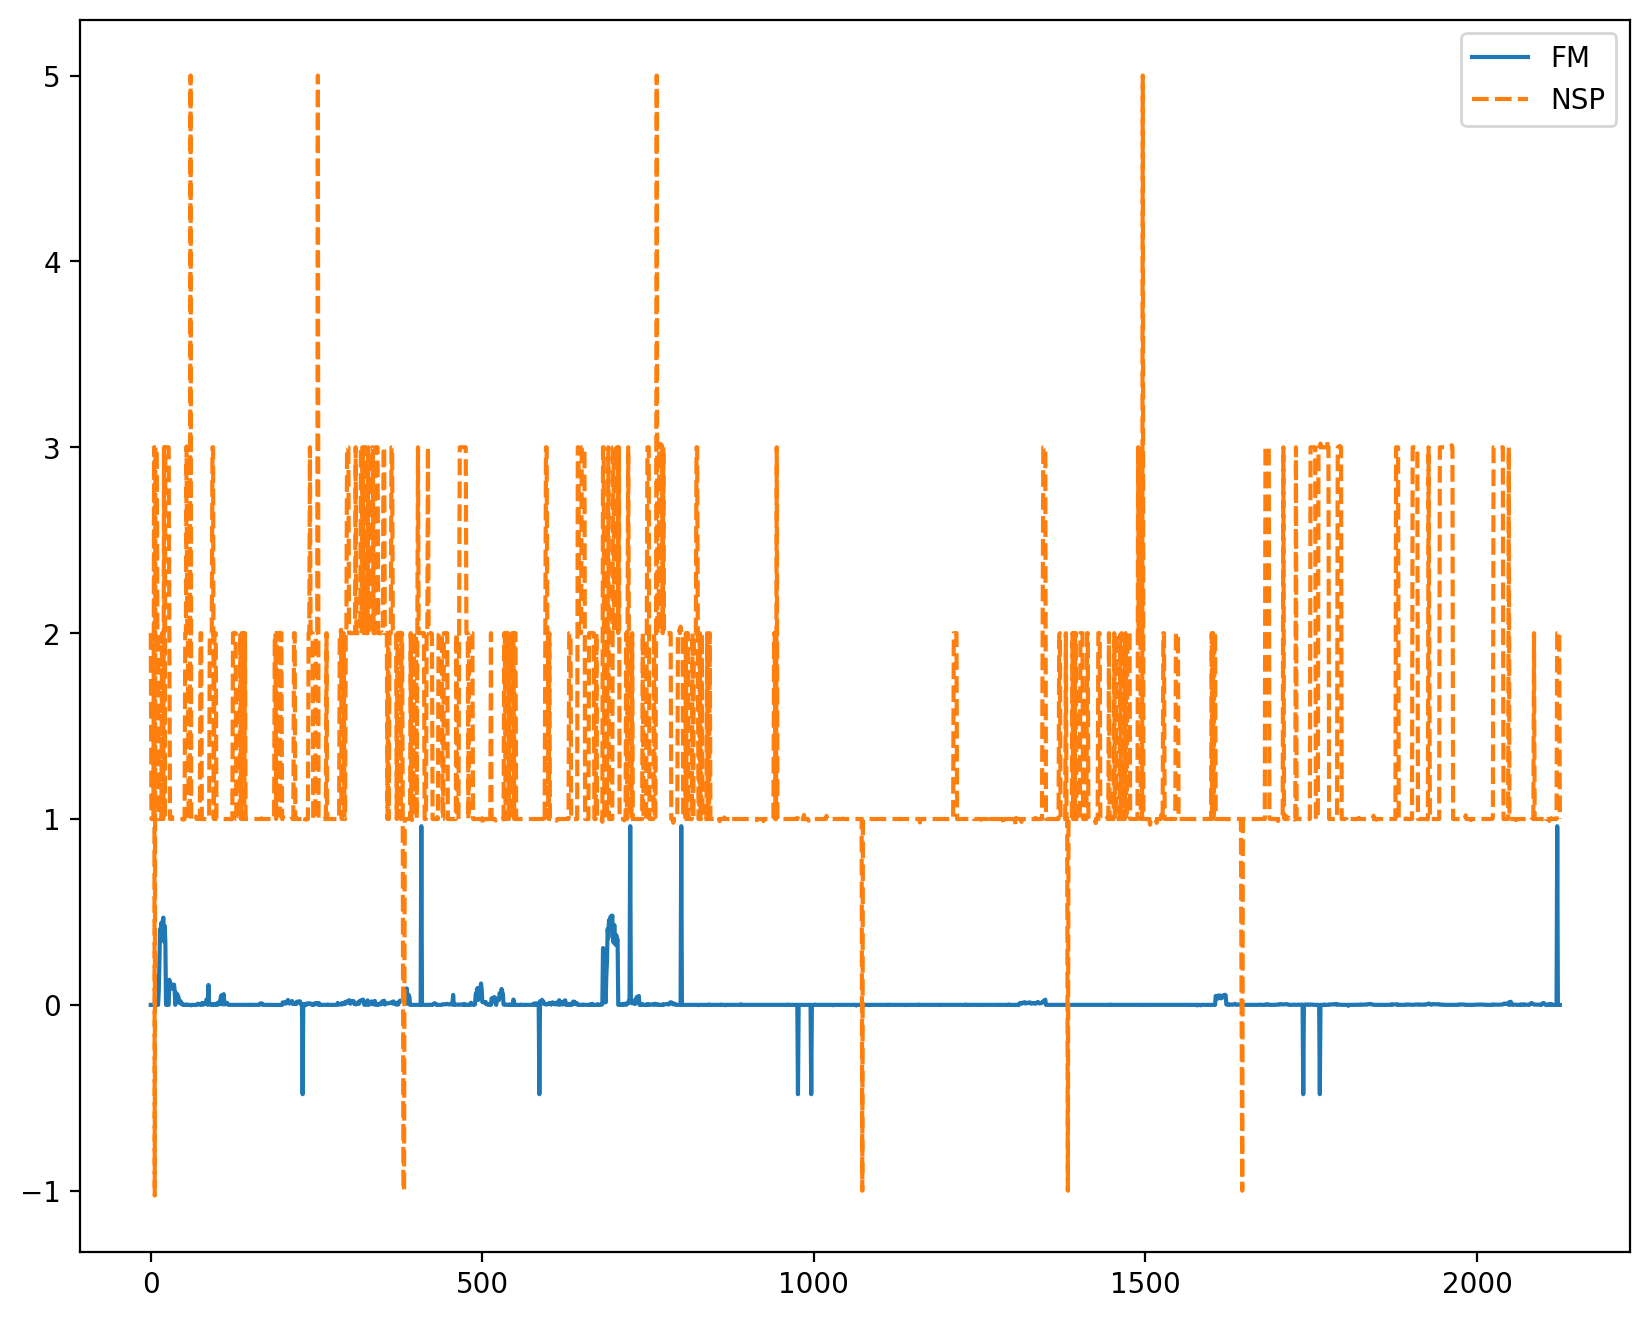

In [206]:
sns.lineplot((df_new.FM, df_new.NSP))


In [207]:
nsp_distribution = df['NSP'].value_counts()
print(nsp_distribution)


NSP
 1.000000    1544
 2.000000     280
 3.000000     164
-1.000000       5
 5.000000       4
             ... 
 0.992847       1
 2.971309       1
 0.984834       1
 0.991200       1
 1.990464       1
Name: count, Length: 111, dtype: int64


In [208]:
def categorize_nsp(nsp_value):
    if nsp_value <= 1:
        return 'Normal'
    elif nsp_value <= 2:
        return 'Suspect'
    else:
        return 'Pathological' 


In [209]:
df_new['NSP_Category'] = df_new['NSP'].apply(categorize_nsp)


In [210]:
df_new


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP NSP_Category  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000      Suspect  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000       Normal  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000       Normal  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000       Normal  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000       Normal  
...    ...        ...   ...    ...       ...       ...          ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000      Suspect  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000      Suspect  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464      Suspect  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000      Suspect  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000       Normal  

[2103 rows x 15 columns]

([<matplotlib.patches.Wedge at 0x196026d6f90>,
 [Text(-0.7970345886952929, 0.7581133585574954, 'Suspect'),
  Text(0.5655789607890671, -0.9434619436483694, 'Normal'),
  Text(1.0600337040569328, -0.2938171987194409, 'Pathological')])

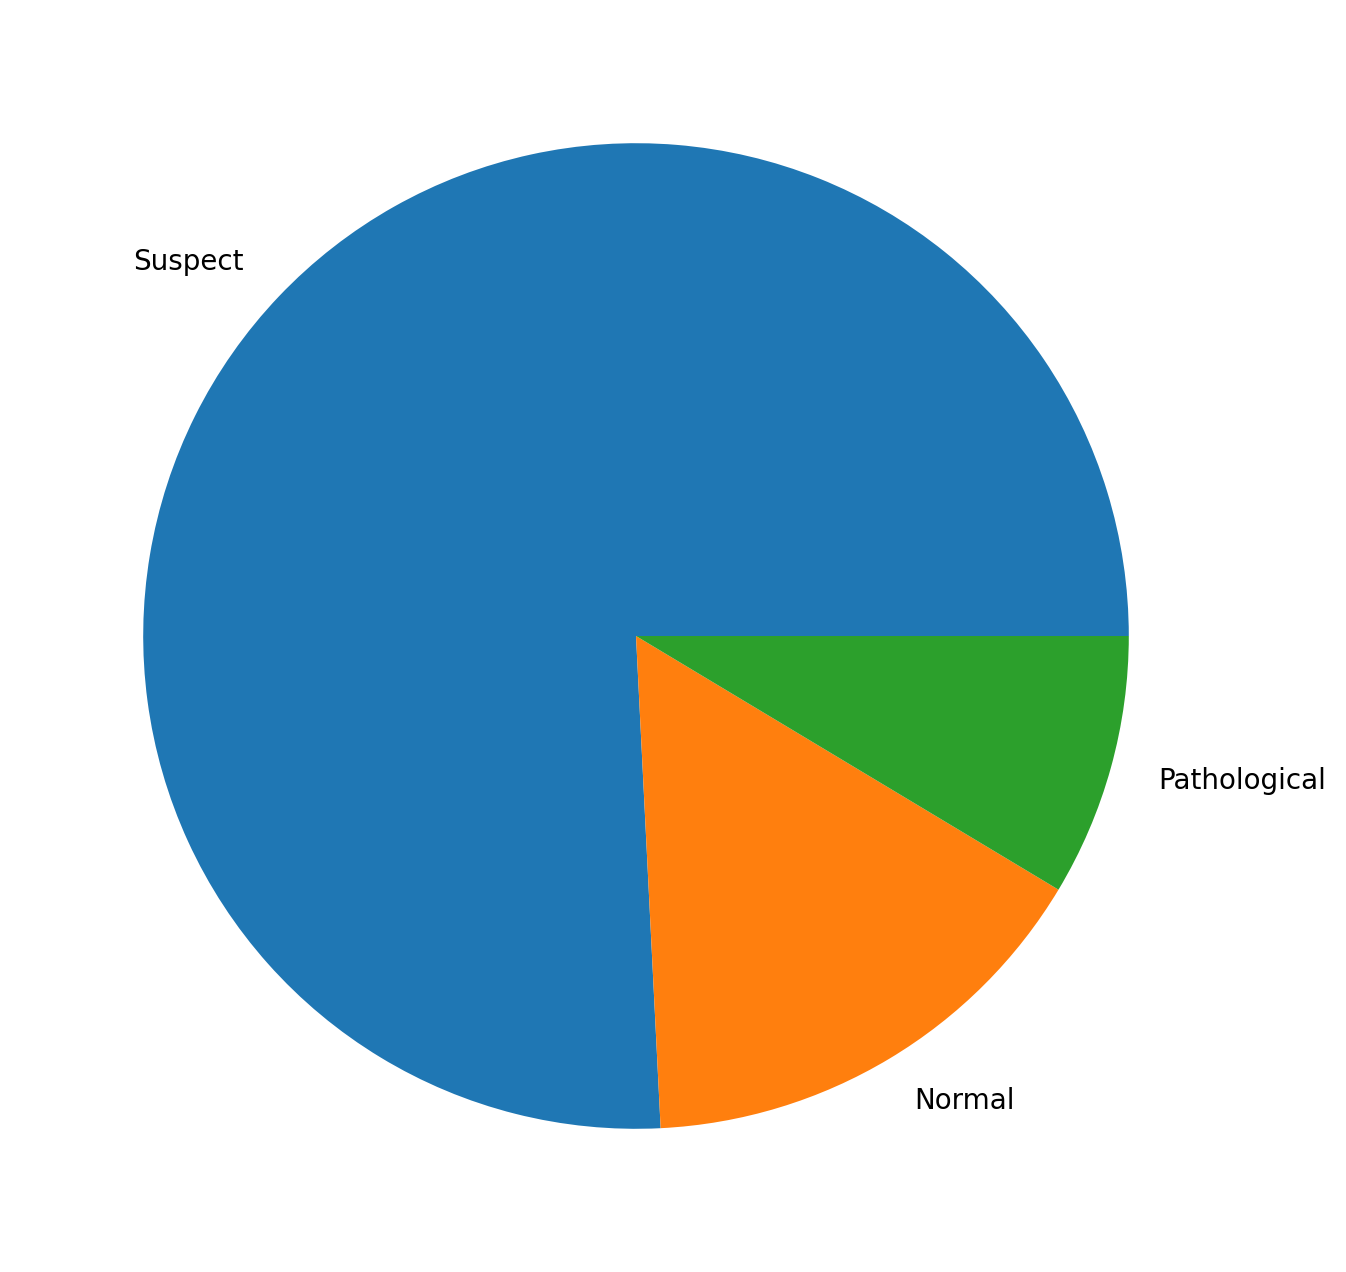

In [211]:
plt.pie(df_new.NSP_Category.value_counts(), labels= df_new.NSP_Category.unique())   


# Conclusion
### Conclusions

1. **Significance of Outliers**:
   - Outliers in variables like **FM (Fetal Movements)**, **ALTV (Abnormal Long-Term Variability)**, and **ASTV (Abnormal Short-Term Variability)** are likely indicative of critical fetal conditions. These outliers should not be discarded without further investigation, as they may represent significant health risks.

2. **Target Variable (NSP)**:
   - The **NSP** variable, which categorizes fetal health into "Normal," "Suspect," and "Pathological," serves as a crucial outcome measure. A high frequency of outliers in this category indicates potential clinical cases that require further scrutiny.

3. **Correlations**:
   - **FM** shows substantial correlations with heart rate variability measures, suggesting that fetal movements are closely linked to the overall health and well-being of the fetus. Increased variability (indicated by high ALTV or ASTV) often correlates with better fetal health outcomes, while decreased variability may indicate distress.

4. **Clinical Implications**:
   - Patterns observed in **FM** and its relationship with variability measures suggest that close monitoring of these indicators could be essential for early detection of fetal distress. This is particularly important in high-risk pregnancies.

5. **Distribution of NSP Categories**:
   - The distribution of the **NSP** categories can provide insights into the overall health of the population represented in the dataset. A high count of "Suspect" or "Pathological" classifications may indicate a need for targeted interventions or improvements in prenatal care.

6. **Potential for Predictive Modeling**:
   - Given the relationships between various variables and the target **NSP**, this dataset could serve as a foundation for building predictive models. Such models could assist healthcare professionals in identifying at-risk pregnancies and taking proactive measures.

### Recommendations:
- **Further Analysis**: Conduct deeper analyses, potentially utilizing machine learning techniques to predict **NSP** based on other features.
- **Clinical Monitoring**: Utilize findings to improve monitoring protocols in clinical settings, especially focusing on fetal movements and heart rate variability.
- **Research**: Investigate further into the underlying causes of significant outliers to improve understanding of fetal health.

### Final Thoughts:
Understanding and interpreting data like this is crucial for enhancing fetal health outcomes. By focusing on critical indicators and recognizing the importance of outliers, healthcare professionals can make more informed decisions and potentially improve care strategies for expectant mothers and their babies. 